In [6]:
import subprocess
import json
from youtube_transcript_api import YouTubeTranscriptApi
import time



def buscar_videos_yt_dlp(query, max_results=10):
    cmd = [
        "python", "-m", "yt_dlp",
        f"ytsearch{max_results}:{query}",
        "--print", "%(id)s %(title)s",
        "--skip-download"
    ]


    result = subprocess.run(cmd, capture_output=True, text=True)
    linhas = result.stdout.strip().split("\n")
    
    videos = []
    for linha in linhas:
        partes = linha.strip().split(" ", 1)
        if len(partes) == 2:
            video_id, titulo = partes
            videos.append((video_id, titulo))
    return videos

def baixar_legendas(video_id):
    try:
        transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['pt', 'pt-BR', 'en'])
        texto = " ".join([item['text'] for item in transcript])
        return texto
    except Exception as e:
        print(f"Sem legenda para {video_id}: {e}")
        return None

def montar_corpus(query, max_videos=10):
    videos = buscar_videos_yt_dlp(query, max_videos)
    corpus = []

    for video_id, titulo in videos:
        print(f"Baixando legenda de: {titulo}")
        legenda = baixar_legendas(video_id)
        if legenda:
            corpus.append({
                "video_id": video_id,
                "titulo": titulo,
                "legenda": legenda
            })
        time.sleep(1)
    
    return corpus

# Exemplo de uso
corpus = montar_corpus("apostas esportivas", 10)

# Salvar em JSON
with open("corpus_apostas.json", "w", encoding="utf-8") as f:
    json.dump(corpus, f, ensure_ascii=False, indent=2)

print("Corpus finalizado.")


Baixando legenda de: ABANDONE AS APOSTAS ESPORTIVAS!
Sem legenda para yFPYOkRxJ9k: no element found: line 1, column 0
Baixando legenda de: A Estratégia Mais SIMPLES e SEGURA das Apostas Esportivas (Pouca Gente Conhece!)
Sem legenda para A3OCtBYIl2Q: no element found: line 1, column 0
Baixando legenda de: 04 DICAS PARA TER SUCESSO NAS APOSTAS ESPORTIVAS
Baixando legenda de: COMO GANHAR DINHEIRO COM APOSTAS ESPORTIVAS | FULLTRADER | PODCOLAR
Baixando legenda de: GESTÃO DE BANCA PARA INICIANTES NAS APOSTAS ESPORTIVAS [MÉTODO VALIDADO 2023]
Sem legenda para p3T2l5tJDjI: no element found: line 1, column 0
Baixando legenda de: TESTEI GRUPO VIP DE APOSTAS ESPORTIVAS DURANTE 7 DIAS! GANHEI MUITO DINHEIRO?
Baixando legenda de: AS 5 PIORES APOSTAS PARA FAZER NA BET365 E BETANO | Pare de perder dinheiro com aposta esportiva
Baixando legenda de: Como ganhar 100,00 por dia com Apostas Esportivas
Sem legenda para Fnba1gCzW9c: no element found: line 1, column 0
Baixando legenda de: Cliente lucrou 7.0

In [7]:
import json

# Caminho do arquivo JSON com o corpus
caminho_json = "corpus_apostas.json"

# Caminho do arquivo de saída .txt
caminho_txt = "legendas_apostas.txt"

# Carregar o JSON
with open(caminho_json, "r", encoding="utf-8") as f:
    corpus = json.load(f)

# Extrair todas as legendas e juntar em um único texto
todas_legendas = "\n\n".join([item["legenda"] for item in corpus if "legenda" in item])

# Salvar no arquivo .txt
with open(caminho_txt, "w", encoding="utf-8") as f:
    f.write(todas_legendas)

print(f"Arquivo '{caminho_txt}' criado com sucesso.")


Arquivo 'legendas_apostas.txt' criado com sucesso.


In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     /home/al.daniel.pereira/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/al.daniel.pereira/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True


Top 20 palavras mais comuns:
dinheiro: 86
tá: 64
cara: 63
ganhar: 58
vou: 53
aposta: 50
apostas: 45
jogo: 41
r: 41
né: 40
ganha: 39
vamos: 35
perder: 34
casa: 32
futebol: 31
apostar: 27
gente: 26
esportiva: 26
dia: 25
perde: 24


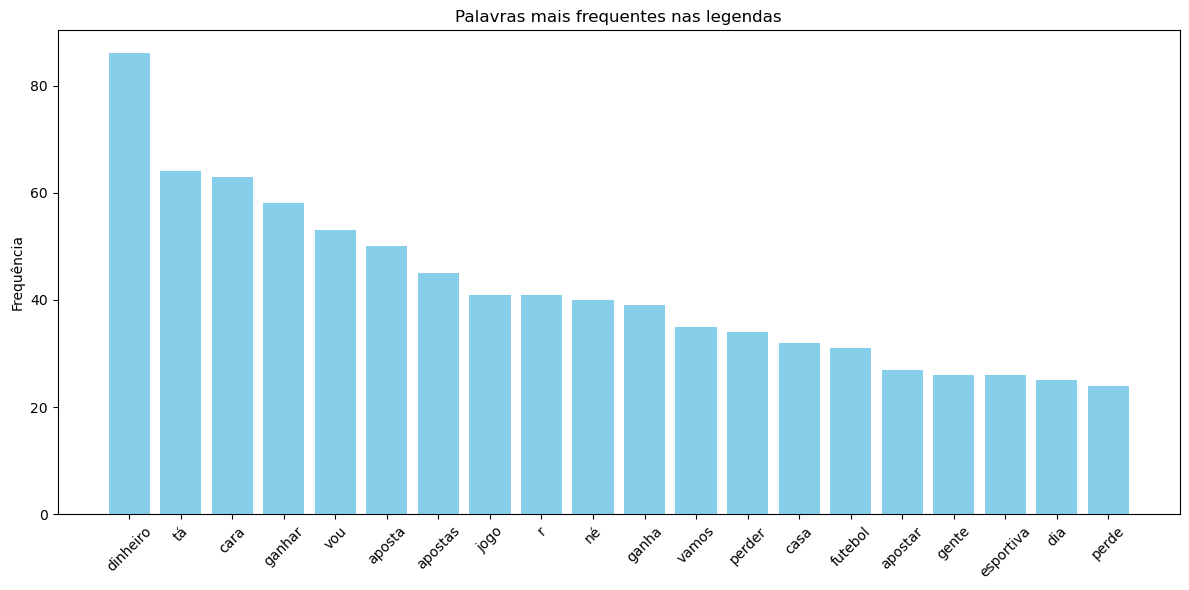

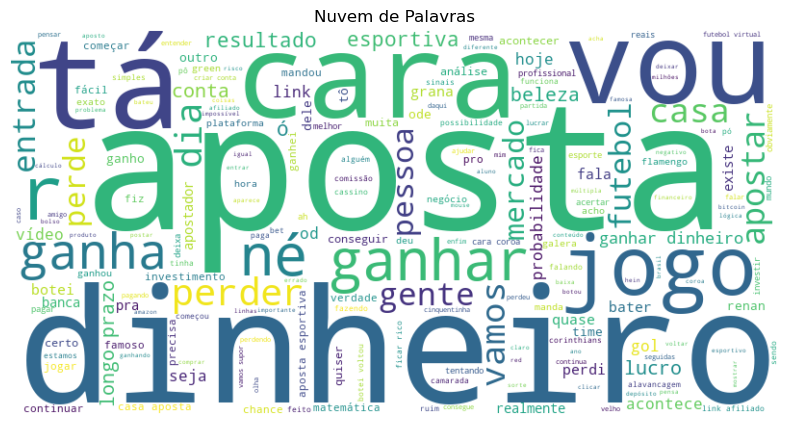

In [16]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Garantir que o modelo spaCy esteja disponível
try:
    nlp = spacy.load("pt_core_news_sm")
except OSError:
    import subprocess
    subprocess.run(["python", "-m", "spacy", "download", "pt_core_news_sm"])
    nlp = spacy.load("pt_core_news_sm")

# 1. Carregar o texto
with open("legendas_apostas.txt", "r", encoding="utf-8") as f:
    texto = f.read()

# 2. Processar com spaCy
doc = nlp(texto)

# 3. Filtrar tokens: apenas palavras, minúsculas, sem stopwords
tokens_filtrados = [
    token.text.lower() for token in doc
    if token.is_alpha and not token.is_stop
]

# 4. Frequência das palavras
frequencias = Counter(tokens_filtrados)

# 5. Mostrar as 20 palavras mais comuns
print("\nTop 20 palavras mais comuns:")
for palavra, freq in frequencias.most_common(20):
    print(f"{palavra}: {freq}")

# 6. Gráfico de barras
plt.figure(figsize=(12, 6))
mais_comuns = frequencias.most_common(20)
palavras, contagens = zip(*mais_comuns)
plt.bar(palavras, contagens, color='skyblue')
plt.xticks(rotation=45)
plt.title("Palavras mais frequentes nas legendas")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

# 7. Nuvem de palavras
nuvem = WordCloud(
    width=800, height=400, background_color='white',
    stopwords=nlp.Defaults.stop_words, colormap='viridis'
).generate(" ".join(tokens_filtrados))

plt.figure(figsize=(10, 5))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis("off")
plt.title("Nuvem de Palavras")
plt.show()
